In [1]:
# Import pandas
import pandas as pd
#Avoid errors when renaming columns in the same dataframe: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
pd.options.mode.copy_on_write = True

In [2]:
# Load in the listings data
df=pd.read_csv('data/listings.csv')

####  Exercise 1: Create a bar chart and dataframe of top 10 Neigborhoods that have the most expensive listsings on average. 
Our goal is to make a chart reflecting the top 10 most expensive Neighborhoods.
This is a little dubious - we assign "expensive" by calculating the average cost of 
an AirBnB in each neighborhood.

1. Make a dataframe that sorts the neighborhood field by decending price.  
1. Use head to cut back top the top 10
1. Use pandas.plot.barh to generate a histogram (see [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html) wiki for details on pandas.plot.barh)
1. Display the data that you used to create the bar chart as a table with neighborhood and average price as the columns.  You want this to match the pivot that you create in youur dashboard

<Axes: ylabel='neighbourhood'>

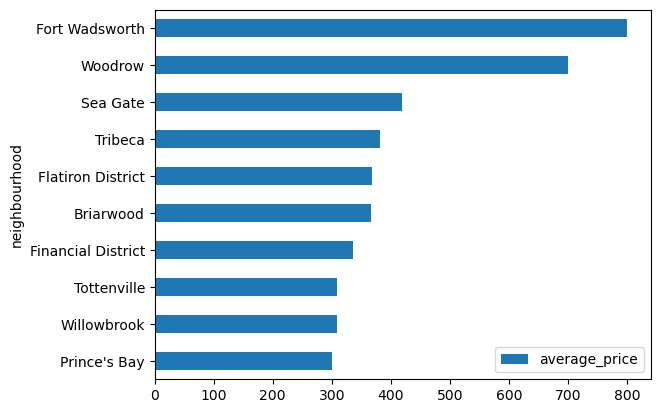

In [3]:
# our goal is to make a chart reflecting the top 10 most expensive Neighborhoods
# This is a little dubious - we assign "expensive" by calculating the average cost of 
# an AirBnB in each neighborhood, then we take the top ten and weight each slice 
# by the average value.
#
# make a dataframe that sorts the neighborhood field by decending price.  
# Use head to cut back top the top 10. Then, use df.plot.barh to generate a histogram.


#Grouping neighbourhood by price to find the average price. Also sort the values in descending order while resetting the index to properly have rows from greatest to least.
df_neigh_sort = df.groupby('neighbourhood')['price'].agg(['mean', 'count']).sort_values(by='mean', ascending=False).reset_index()

#Extract the top 10 expensive neighbourhoods
df_neigh_exp_10 = df_neigh_sort.head(10)

#Renaming price to average_price
df_neigh_exp_10.rename(columns={'mean':'average_price'},inplace=True)

#Create barchart using .barh. Also sort in descending order
df_neigh_exp_10.sort_values(by='average_price').plot.barh(x='neighbourhood', y='average_price')

In [4]:
# Now, display the top 10 datframe you created as a table with columns
# neighbourhood and price

df_neigh_exp_10

,neighbourhood,average_price,count
0,Fort Wadsworth,800.000000,1
1,Woodrow,700.000000,1
2,Sea Gate,418.230769,13
3,Tribeca,381.107143,196
4,Flatiron District,367.415584,77
5,Briarwood,366.162162,37
6,Financial District,335.385057,522
7,Willowbrook,309.000000,1
8,Tottenville,309.000000,1
9,Prince's Bay,300.000000,3


####  Exercise 2: Create a bar chart and dataframe of top 10 Neigborhoods that have the LEAST expensive listsings on average. 

Do the same thing you just did, but get the 10 least expensive neighborhoods.  Sort them from lowest average price to highest.  Bew wure to provide a pivot table.

<Axes: ylabel='neighbourhood'>

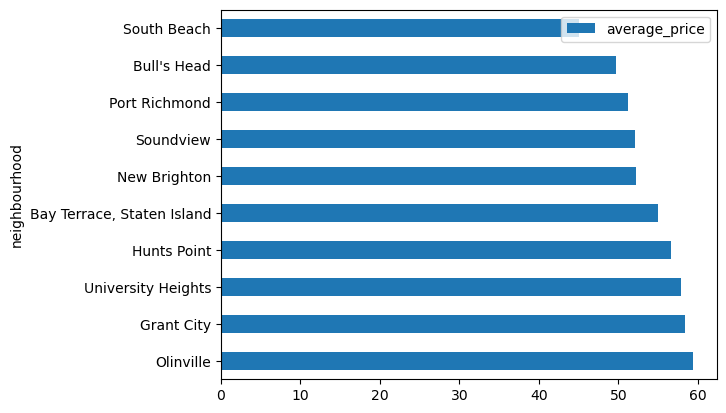

In [5]:
# Here we make the same chart using the bottom 10 Neighborhoods
# by average price.  We sort ascending in this one.

#Use the sorted dataframe to get the last 10 values. Values are automatically sorted in ascending order.
df_neigh_cheap = df_neigh_sort.tail(10)

#Rename mean in new dataframe
df_neigh_cheap.rename(columns={'mean':'average_price'},inplace=True)

#Plot using barh
df_neigh_cheap.plot.barh(x='neighbourhood', y='average_price')

In [6]:
# we also would like to have the corresponding pivot table of the lowest 10
df_neigh_cheap.sort_values('average_price', inplace=True)
df_neigh_cheap

,neighbourhood,average_price,count
221,South Beach,45.000000,4
220,Bull's Head,49.666667,3
219,Port Richmond,51.222222,9
218,Soundview,52.055556,18
217,New Brighton,52.250000,4
216,"Bay Terrace, Staten Island",55.000000,1
215,Hunts Point,56.583333,24
214,University Heights,57.826087,23
213,Grant City,58.400000,10
212,Olinville,59.428571,7


#  Now make all four widgets (the two charts and the two dataframes) in a Tableau dashboard!

##### Link:
https://public.tableau.com/app/profile/robert.neagu/viz/CTP_Week3/Dashboard1#2